# Setting up Kaggle with Collab to Download Dataset
1. Create a API Token from yout Kaggle Account.
2. Download "kaggle.json" which is your Kaggle API Token.
3. Install kaggle
```
!pip install kaggle
```
4. Create a directory named kaggle
```
!mkdir .kaggle
```
5. Upload "kaggle.json" to content folder in collab. This folder contains "sample_data" folder provided by collab. We are uploading to this since ".kaggle" is not shown in side window.
6. Run the following command to mv the .json to .kaggle
```
!mv kaggle.json .kaggle
```
7. To set set tha path of ".kaggle" to root. Use the following commands.
```
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
```
8. Now we have to restrict the permissions of the file.
```
!chmod 600 /root/.kaggle/kaggle.json
```
9. Set the path of kaggle. @TODO: Read MORE
```
!kaggle config set -n path -v{/content}
```
10. Now go to Dataset Page and copy the link to download the dataset.Append " -p /path/to/dataset" to the command copied.
```
!kaggle datasets download -d slothkong/10-monkey-species -p /content/datasets
```

COPY-PASTE VERSION
```
!pip install kaggle
!mkdir .kaggle
!mv kaggle.json .kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!kaggle datasets download -d slothkong/10-monkey-species -p /content/datasets
```

In [0]:
!pip install kaggle

In [0]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
!mv kaggle.json .kaggle

mv: cannot stat 'kaggle.json': No such file or directory


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!kaggle datasets download -d slothkong/10-monkey-species -p /content/datasets

100% 546M/547M [00:02<00:00, 251MB/s]
100% 547M/547M [00:02<00:00, 256MB/s]


In [0]:
!unzip datasets/\*.zip

Archive:  datasets/10-monkey-species.zip
  inflating: monkey_labels.txt       
  inflating: training/training/n0/n0018.jpg  
  inflating: training/training/n0/n0019.jpg  
  inflating: training/training/n0/n0020.jpg  
  inflating: training/training/n0/n0021.jpg  
  inflating: training/training/n0/n0022.jpg  
  inflating: training/training/n0/n0023.jpg  
  inflating: training/training/n0/n0024.jpg  
  inflating: training/training/n0/n0025.jpg  
  inflating: training/training/n0/n0026.jpg  
  inflating: training/training/n0/n0027.jpg  
  inflating: training/training/n0/n0028.jpg  
  inflating: training/training/n0/n0029.jpg  
  inflating: training/training/n0/n0030.jpg  
  inflating: training/training/n0/n0031.jpg  
  inflating: training/training/n0/n0032.jpg  
  inflating: training/training/n0/n0033.jpg  
  inflating: training/training/n0/n0034.jpg  
  inflating: training/training/n0/n0035.jpg  
  inflating: training/training/n0/n0036.jpg  
  inflating: training/training/n0/n0037.jpg  
 

# Setting Up Fast-AI and Notebook

In [109]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Importing Libraries

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd

# Looking at Data

## Setting up paths

In [0]:
# Moving Folder up to parent
!mv datasets/10-monkey-species/training/train datasets/10-monkey-species/

In [0]:
!mv datasets/10-monkey-species/validation/valid datasets/10-monkey-species/

In [0]:
current_path = pathlib.Path.cwd()
data_path = current_path/"datasets"/"10-monkey-species"



In [144]:
data_path.ls()

[PosixPath('/content/datasets/10-monkey-species/monkey_labels.txt'),
 PosixPath('/content/datasets/10-monkey-species/.ipynb_checkpoints'),
 PosixPath('/content/datasets/10-monkey-species/valid'),
 PosixPath('/content/datasets/10-monkey-species/train')]

## Reading monkey_labels.txt
1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html
2. https://thispointer.com/pandas-apply-a-function-to-single-or-selected-columns-or-rows-in-dataframe/
3. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
4. 

In [0]:
file_content = ""
with open(data_path/"monkey_labels.txt") as f:
  file_content = f.readlines()

In [117]:
print(type(file_content))
print(len(file_content))

<class 'list'>
23


In [0]:
label_data = [ f.split(",") for f in file_content if len(f.split(",")) > 1 ]

In [0]:
label_data[0] = [col_name.strip() for col_name in label_data[0]]

In [0]:
label_df = pd.DataFrame(label_data[1:], columns=label_data[0])

In [0]:
label_df["Latin Name"] = label_df["Latin Name"].apply(str.strip)

In [0]:
label_df["Validation Images"] = label_df["Validation Images"].str.strip()

In [0]:
#label_df = label_df.apply(lambda x: str.strip(x) if x.name == "Validation Images" else x, axis=1)
#modDfObj =    dfObj.apply(lambda x: np.square(x) if x.name == 'b' else x, axis=1)

In [123]:
label_df

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata,mantled_howler,131,26
1,n1,erythrocebus_patas,patas_monkey,139,28
2,n2,cacajao_calvus,bald_uakari,137,27
3,n3,macaca_fuscata,japanese_macaque,152,30
4,n4,cebuella_pygmea,pygmy_marmoset,131,26
5,n5,cebus_capucinus,white_headed_capuchin,141,28
6,n6,mico_argentatus,silvery_marmoset,132,26
7,n7,saimiri_sciureus,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path=data_path, ds_tfms=tfms, size = 256).normalize(imagenet_stats)

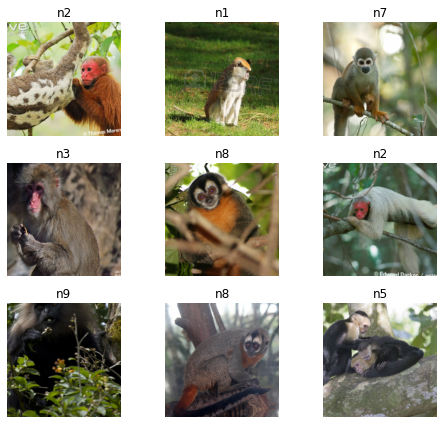

In [153]:
data.show_batch(rows=3, figsize=(7,6))

In [149]:
data.classes

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

In [150]:
data.c

10

In [154]:
data

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

# Training Resnet 34

In [155]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [156]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.830856,0.056572,0.018382,01:01
1,0.827643,0.018278,0.007353,00:59
2,0.489086,0.019797,0.007353,00:59
3,0.319053,0.020456,0.007353,01:00


In [0]:
learn.save('stage-1')

# Results

In [158]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

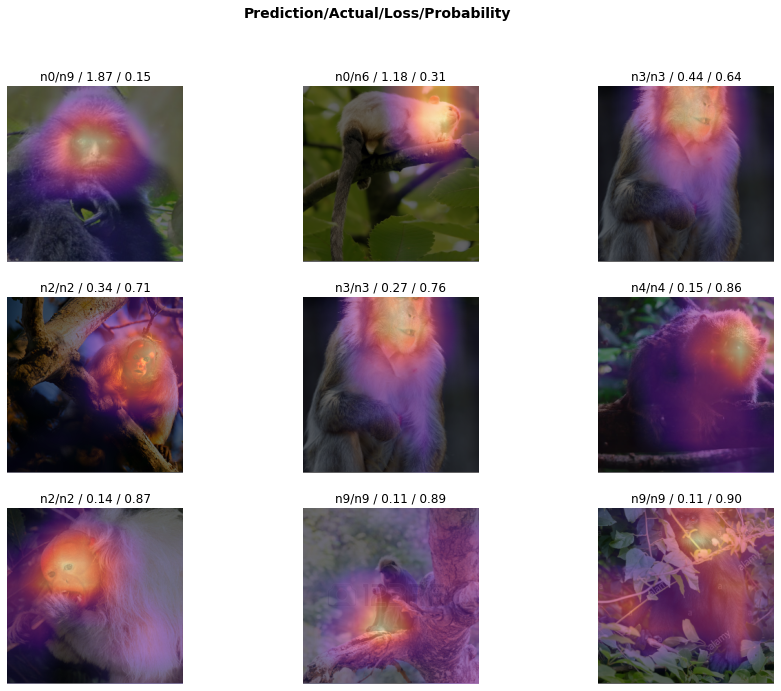

In [161]:
interp.plot_top_losses(9, figsize=(15,11), heatmap= True)

In [160]:
doc(interp.plot_top_losses)

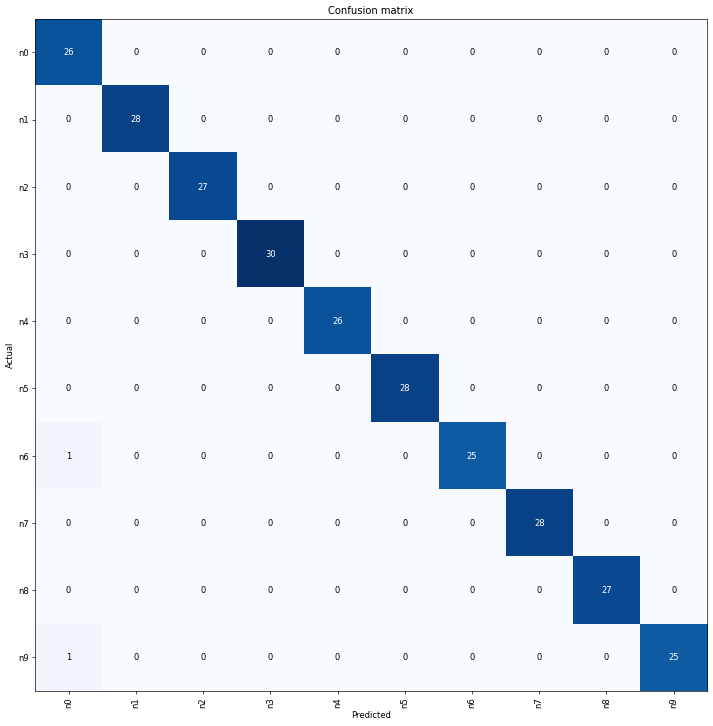

In [162]:
interp.plot_confusion_matrix(figsize = (12,12), dpi = 60)

In [165]:
interp.most_confused()

[('n6', 'n0', 1), ('n9', 'n0', 1)]

In [0]:
learn.unfreeze()

In [167]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.128128,0.269740,0.062500,01:01


In [168]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1097 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
n6,n6,n6,n6,n6
Path: /content/datasets/10-monkey-species;

Valid: LabelList (272 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
n6,n6,n6,n6,n6
Path: /content/datasets/10-monkey-species;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

In [169]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


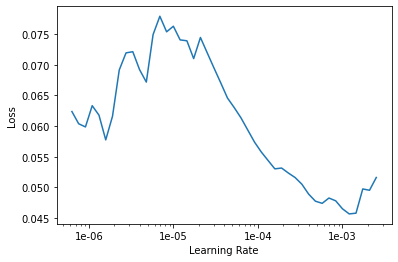

In [170]:
learn.recorder.plot()

In [171]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.104788,0.297516,0.080882,01:00
1,0.111101,0.130026,0.036765,01:01
